In [1]:
#importing all the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import copy
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

from public_tests import*

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Loading the dataset
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes=load_dataset()

y= [0],it's a'non-cat'picture.


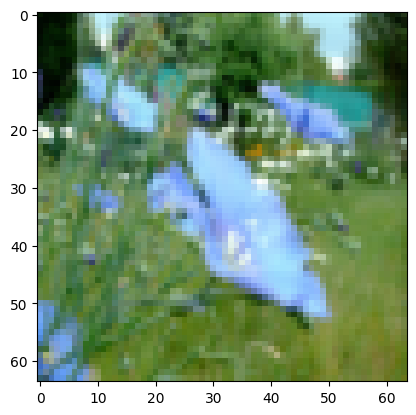

In [3]:
#example of a picture accessing a picture
index=20
plt.imshow(train_set_x_orig[index])
print("y= "+str(train_set_y[:,index])+",it's a'"+classes[np.squeeze(train_set_y[:,index])].decode("utf-8")+"'picture.")

In [4]:
#finding no. of train examples(m_train)test examples(m_test),height and width of training set
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
#flattening the train and test datasets and reshaping them
train_set_x_flattened=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flattened=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flattened.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flattened.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [6]:
#standardizing the value in a specific range
train_set_x=train_set_x_flattened/255
test_set_x=test_set_x_flattened/255

In [7]:
# Step 1: helper functions
#creating sigmoid functions to make predictions using log_reg
"""
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
"""
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [8]:
#testing the function
print("sigmoid [0,2])="+str(sigmoid(np.array([0,2]))))

sigmoid [0,2])=[0.5        0.88079708]


In [9]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


In [10]:
#Step2: initialising the parameters
"""
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
"""
def initialise_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0.0

    return w,b


In [11]:
dim=5
w,b=initialise_with_zeros(dim)
assert type(b)==float
print(str(w))
print(str(b))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0.0


In [17]:
#step 3-forward and back propogation
#forward->calculating the loss function
#back->calculating required gradients
"""
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
"""
def propogate(w,b,X,Y):
    m=train_set_x.shape[1]
    A=(sigmoid(np.dot(w.T,X)+b))
    cost=-1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw=1/m*np.dot(X,(A-Y).T)
    db=1/m*np.sum(A-Y)
    cost=np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

    


In [18]:
w=np.array([[1.], [2]])
b = 1.5

# X is using 3 examples, with 2 features each
# Each example is stacked column-wise
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propogate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.00359878]
 [-0.00094796]]
db = -0.0017943164354698063
cost = 0.0022823738336400583


In [28]:
#step6 OPTIMISATION DUDE!!! run gradient descent na
"""
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
"""
def optimise(w,b,X,Y,num_iterations=100,learning_rate=0.009,print_cost=False):
    w=copy.deepcopy(w)
    b=copy.deepcopy(b)
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(w,b,X,Y)
        #humne jo grads dictionary create kari thi usme se retrieve dw and db
        dw=grads["dw"]
        db=grads["db"]
        #updating
        w=w-learning_rate*dw
        b=b-learning_rate*db
        #record the costs
        if i%100==0:
         costs.append(cost)
        #printing the cost when num_iterations=100
         if print_cost:
              print("cost after iteration %i:%f"%(i,cost))

    params={"w":w,
            "b":b}
    grads={"dw":dw,
           "db":db}
    return params,grads,costs
            
        
                



In [31]:
params, grads, costs = optimise(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.99676962]
 [2.00085107]]
b = 1.5016106148670458
dw = [[ 0.00357986]
 [-0.00094332]]
db = -0.0017848391664357231
Costs = [array(0.00228237)]


In [45]:
#final step "PREDICTION"
import numpy as np
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s
'''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
'''
def predict(w,b,X):
    #retrieve number of examples
    m=X.shape[1]
    #initialise the predictions array
    Y_prediction=np.zeros((1,m))
    #we must reshape w taki wo x ki shape ka ho jaye for multiplications
    w=w.reshape(X.shape[0],1)
    #predictions karo finally
    A=sigmoid(np.dot(w.T,X)+b)
    #ab humko pata hai agar p less than 0.5 to 0(classified as non cat) p greater than 0.5
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
             Y_prediction[0,i]=1
        else:
             Y_prediction[0,i]=0

    return Y_prediction   
    

In [47]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))


predictions = [[1. 1. 0.]]


In [53]:
#THE MODEL
#combining all the functions
"""
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
"""
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.5 ,print_cost=False):
    w,b=initialise_with_zeros(X_train.shape[0])
    params,grads,costs=optimise(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w=params["w"]
    b=params["b"]
    Y_predict_train=predict(w,b,X_train)
    Y_predict_test=predict(w,b,X_test)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_predict_test, 
         "Y_prediction_train": Y_predict_train, 
         "w": w, 
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    return d    
    

In [54]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

cost after iteration 0:0.693147
cost after iteration 100:0.584508
cost after iteration 200:0.466949
cost after iteration 300:0.376007
cost after iteration 400:0.331463
cost after iteration 500:0.303273
cost after iteration 600:0.279880
cost after iteration 700:0.260042
cost after iteration 800:0.242941
cost after iteration 900:0.228004
cost after iteration 1000:0.214820
cost after iteration 1100:0.203078
cost after iteration 1200:0.192544
cost after iteration 1300:0.183033
cost after iteration 1400:0.174399
cost after iteration 1500:0.166521
cost after iteration 1600:0.159305
cost after iteration 1700:0.152667
cost after iteration 1800:0.146542
cost after iteration 1900:0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


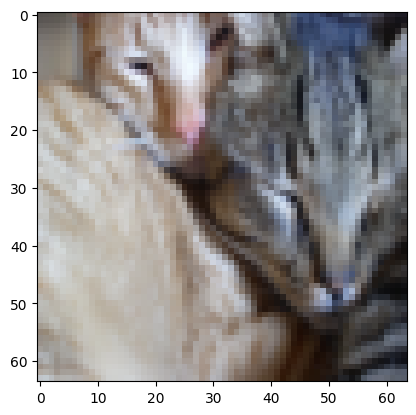

In [60]:
# Example of a picture that was wrongly classified.
index =37
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

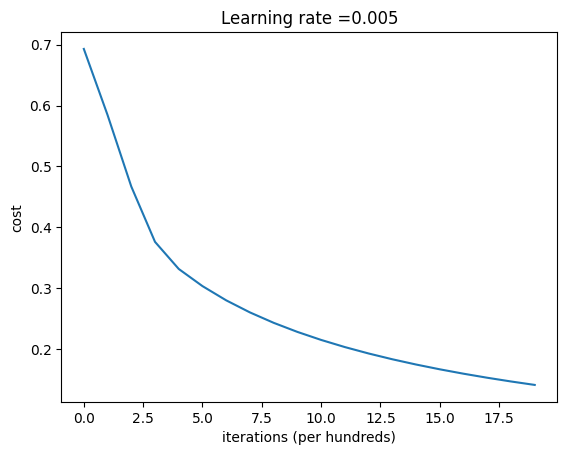

In [61]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



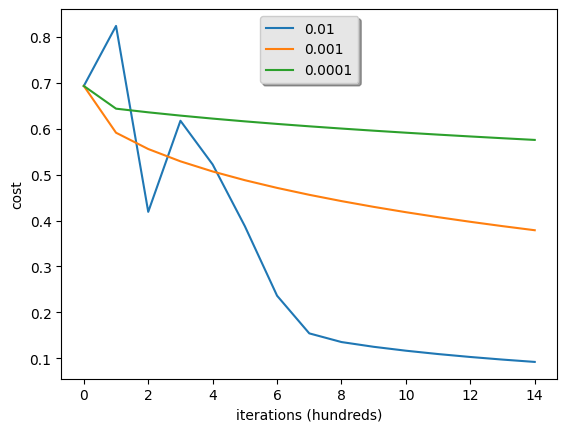

In [62]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 0.0, your algorithm predicts a "non-cat" picture.


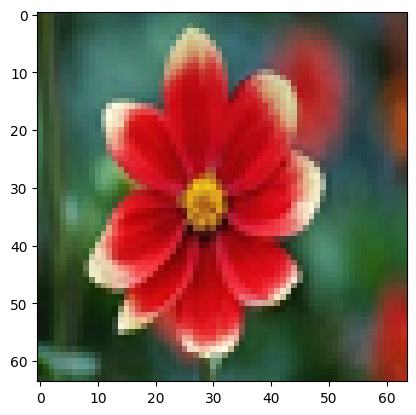

In [69]:
# change this to the name of your image file
my_image = "flw.jpeg"   

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")